# House hold electricity usage dataset

Dataset source in this <a href="https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption">link</a> 

**Data Set Information:**

This archive contains 2,075,259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:

- `1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.`


- `2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.`

**Attribute Information:**

- 1.date: Date in format dd/mm/yyyy

- 2.time: time in format hh:mm:ss

- 3.global_active_power: household global minute-averaged active power (in kilowatt)

- 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

- 5.voltage: minute-averaged voltage (in volt)

- 6.global_intensity: household global minute-averaged current intensity (in ampere)

- 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

- 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

- 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Prediction needed**

Create a model that predict `Global_active_power` on a daily basic for a propery planning of energy comsumption, since the energy grid is really sensitive to change on the demands.

**Model used**

For the predictions I used `SARIMA (Seasonal Autoregressive Integrated Moving Averaga)` which is an extension of ARIMA that supports forecasting time series data with a seasonal component. I decided to use this method since it suits well the dataset since it has a seasonal component as well as a trend component.

**Results**

We training a model which achieved MSE (Mean squared error) of `2.2378456515920967e-05`, which is pretty good, since the predictions of our model do not deviate much from the actual values predicted (see plot below):

![title](results.png)

## Loading data and libraries needed

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#Data preparation
from sklearn.preprocessing import MinMaxScaler

#Statistical test
from statsmodels.tsa.stattools import adfuller

#Analysis of ACF and PACF plots
from pmdarima.arima import auto_arima

#Fit the model
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Results 
from sklearn.metrics import mean_squared_error

In [2]:
# load all data
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
print(df.shape)
df.head()

(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Dealing with missing values and duplicastes

In [5]:
#Checking missing vlues per column   
print(" \nCount total NaN at each column in the House hold energy usage dataset: \n\n", 
      df.isnull().sum()) 

 
Count total NaN at each column in the House hold energy usage dataset: 

 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [6]:
df =df.fillna(df.mean())

In [7]:
#Checking missing vlues per column   
print(" \nCount total NaN at each column for the new dataset: \n\n", 
      df.isnull().sum()) 

 
Count total NaN at each column for the new dataset: 

 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [8]:
without_duplicaste = len(df.duplicated(subset=None, keep='first'))

In [9]:
with_duplicaste = len(df)

In [10]:
print(f"In the original dataset we had 2075259 rows and without duplicates we have {without_duplicaste}")

In the original dataset we had 2075259 rows and without duplicates we have 2075259


In [11]:
if with_duplicaste == without_duplicaste:
    print(f"In the original dataset we had {with_duplicaste} rows and without duplicates we have {without_duplicaste}, hence there are not duplicates")
else:
    print("There are duplicates, removing them...")
    df_no_nan = df_no_nan.duplicated(subset=None, keep='first')

In the original dataset we had 2075259 rows and without duplicates we have 2075259, hence there are not duplicates


## Exploratory data analysis (EDA)

**Observations**

- It seems that `Global active power` and `Global intensity` follow a similar trend over time based on the below time-series plot


- Same applies for `Sub metering 1,2,3` which follow a similar trend as `Global active power`


- The variable `Voltage` seems to be stable overtime with not as much variation overtime as other variables

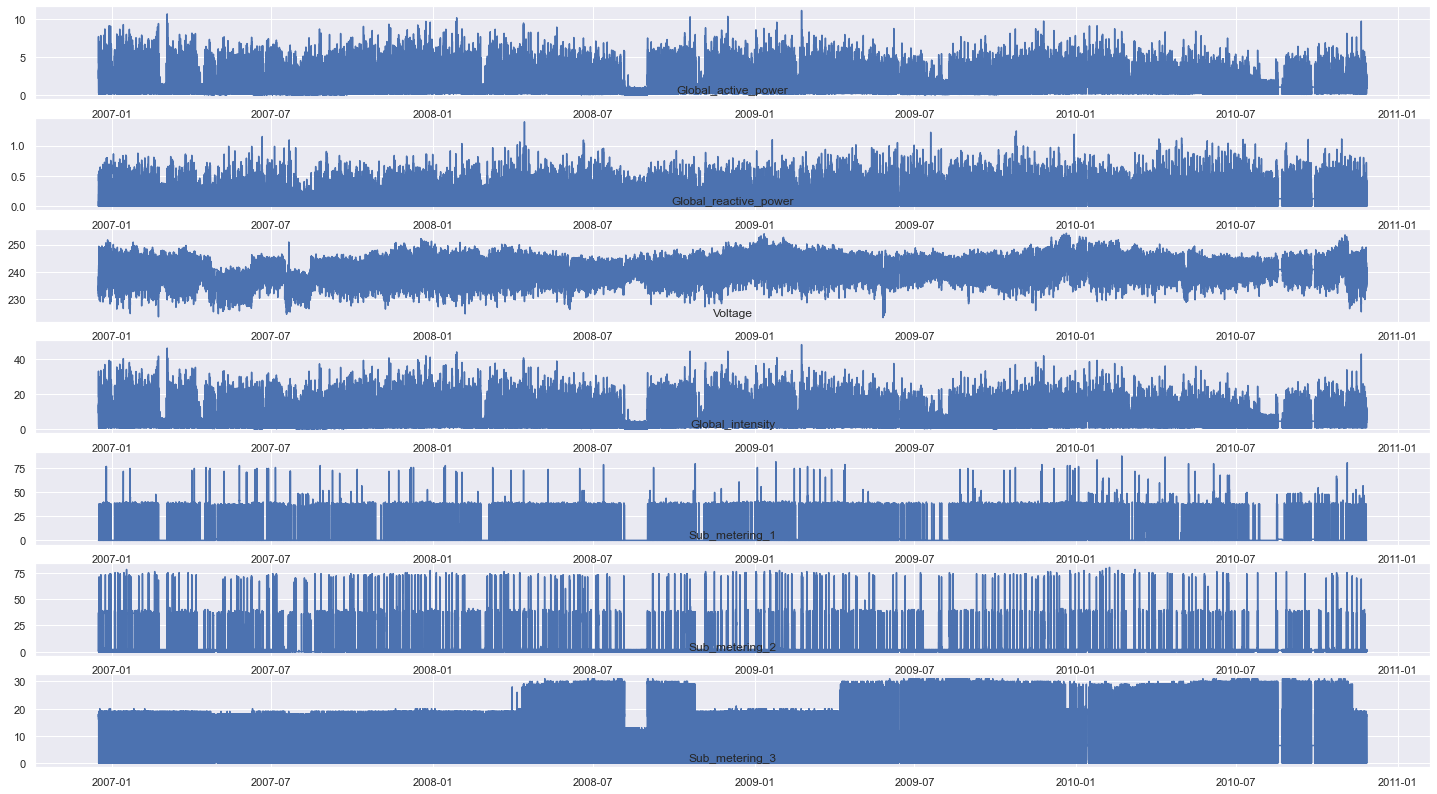

In [12]:
#Setting up plot size
plt.rcParams["figure.figsize"] = (25,14)

# line plot for each variable
pyplot.figure()
for i in range(len(df.columns)):
    pyplot.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    pyplot.plot(df[name])
    pyplot.title(name, y=0)
pyplot.show()

### Exploratory analysis for Global_active_power

**Findings**

We can observe that the global active power peak during the winter months (specially during the month of January) and botton during the summer months (specially during August), which could means that the global active power correlates with the temperatures (in winter months the consumption goes up since people spend more time indoors etc..)

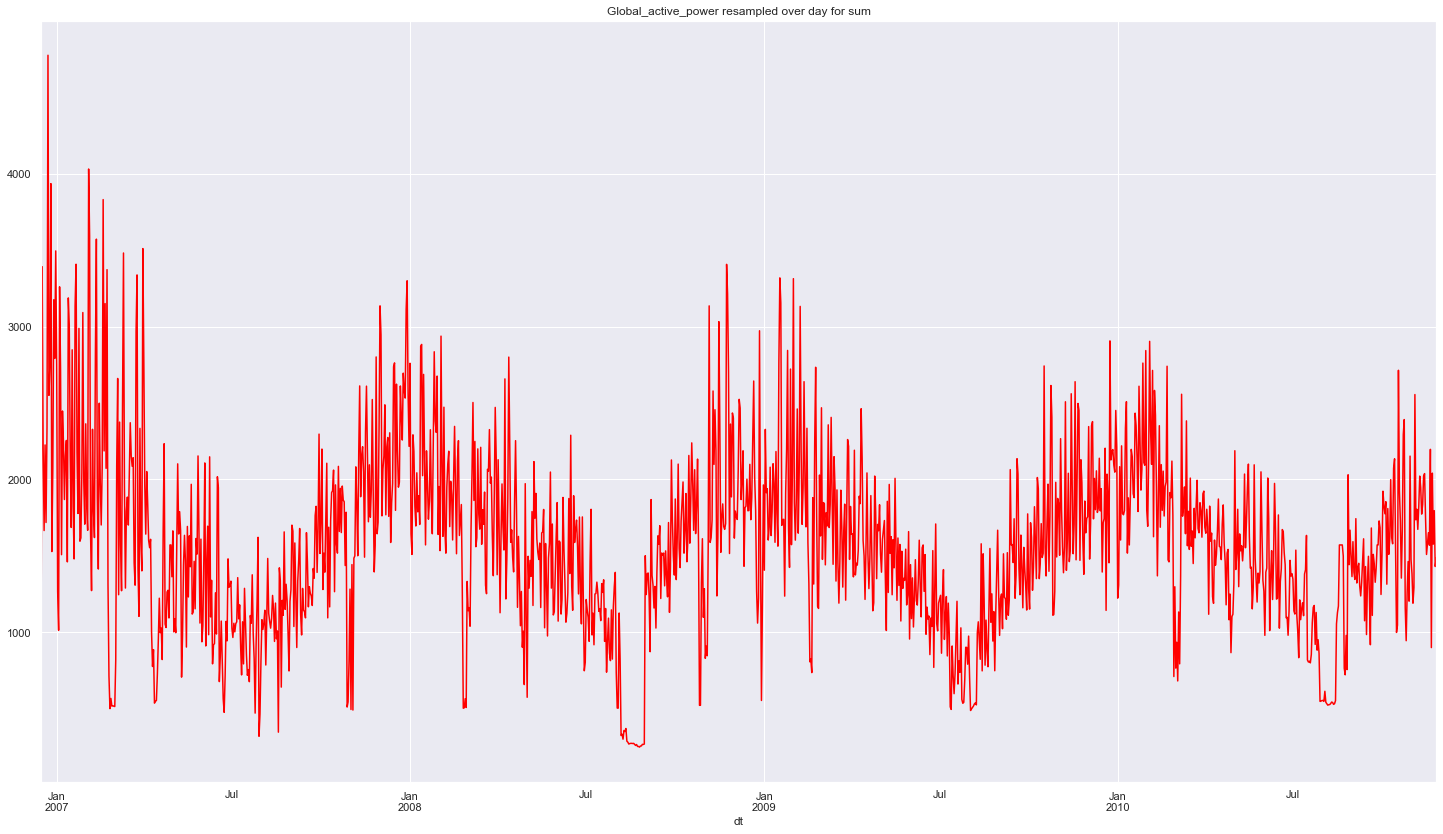

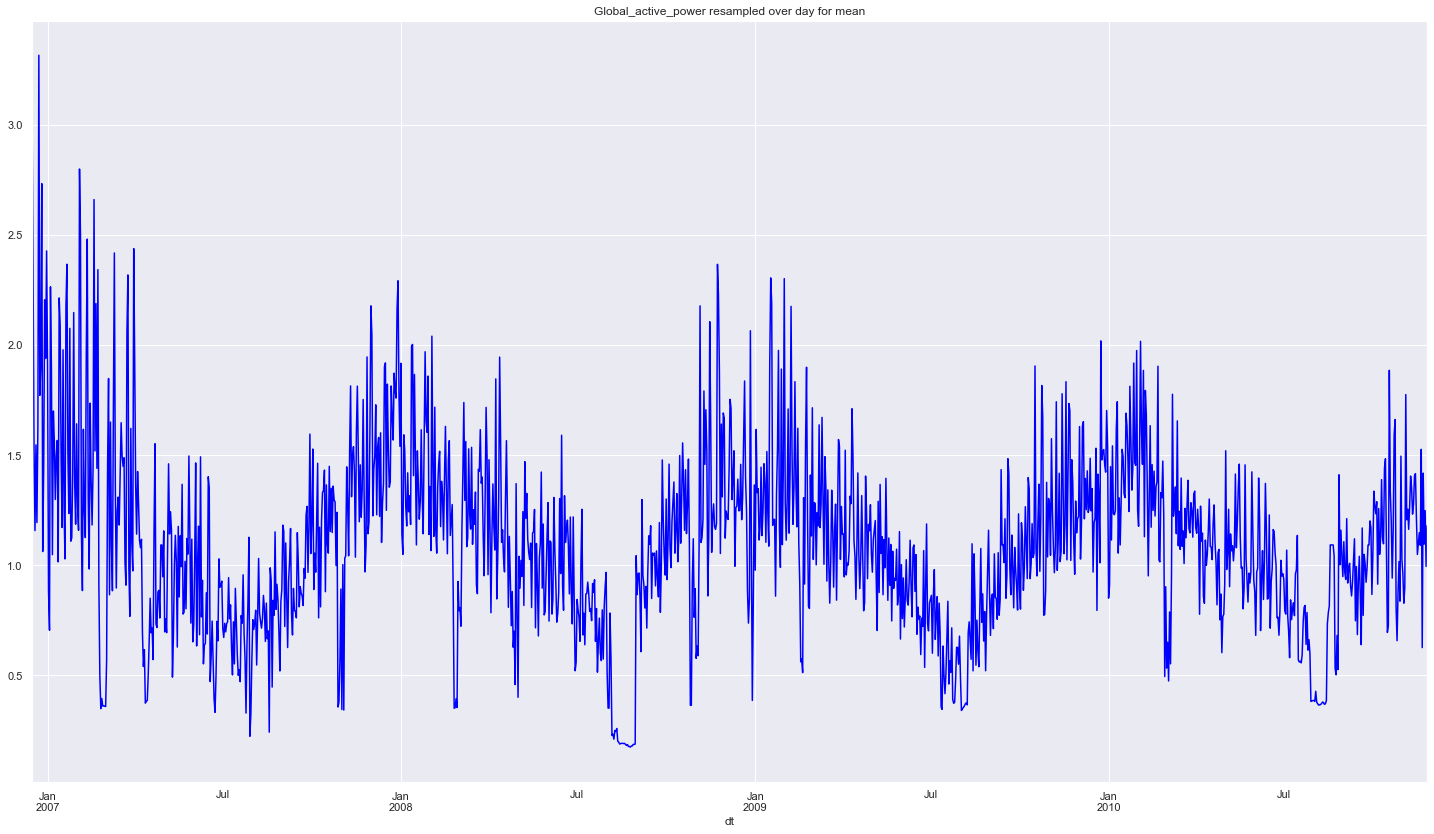

In [13]:
#Resampling over month for better visualization of the variables
df['Global_active_power'].resample('D').sum().plot(title='Global_active_power resampled over day for sum', color= 'red')  
plt.show()

df['Global_active_power'].resample('D').mean().plot(title='Global_active_power resampled over day for mean', color= 'blue')  
plt.show() 

### Exploratory analysis for Global_intensity



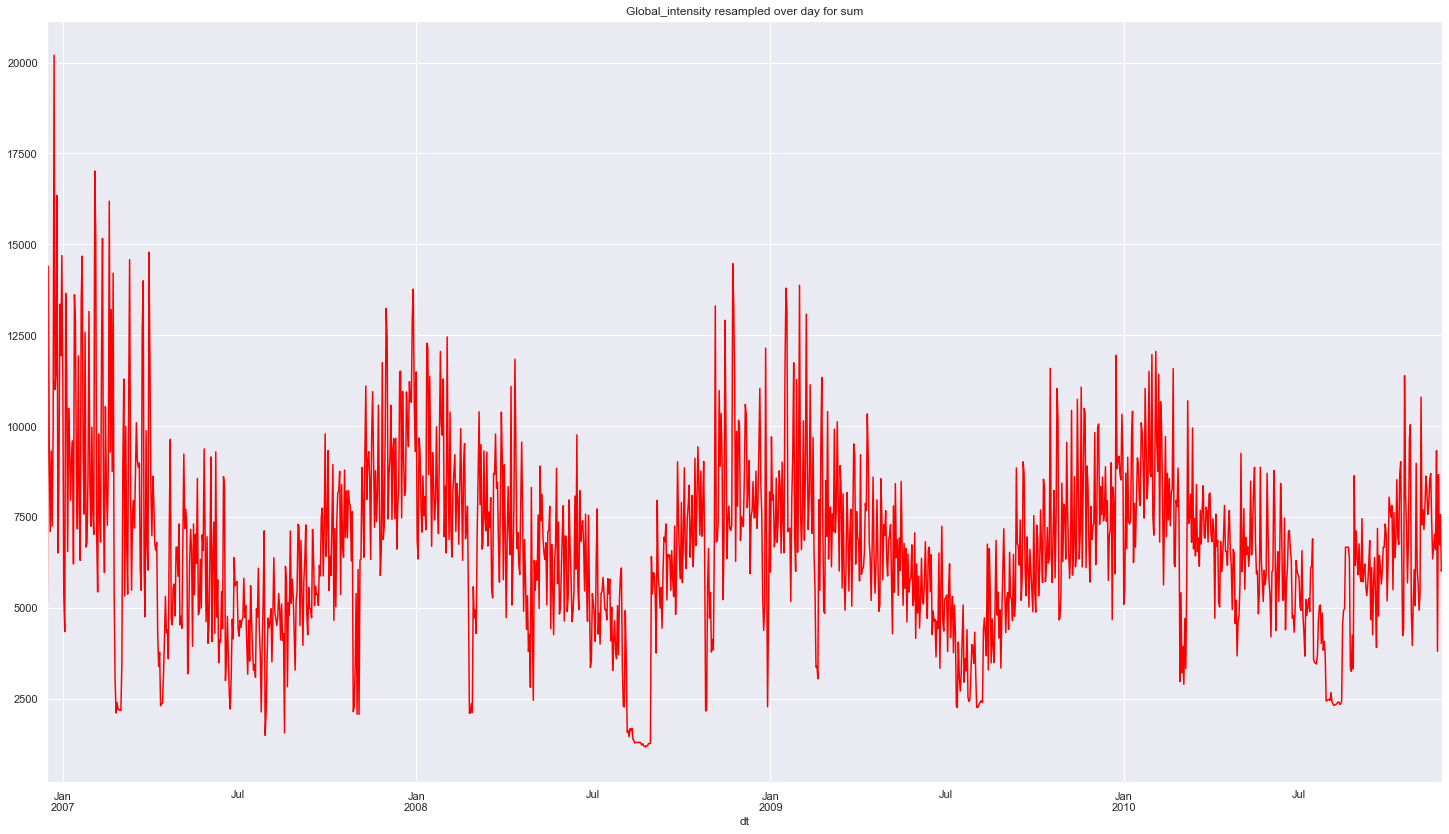

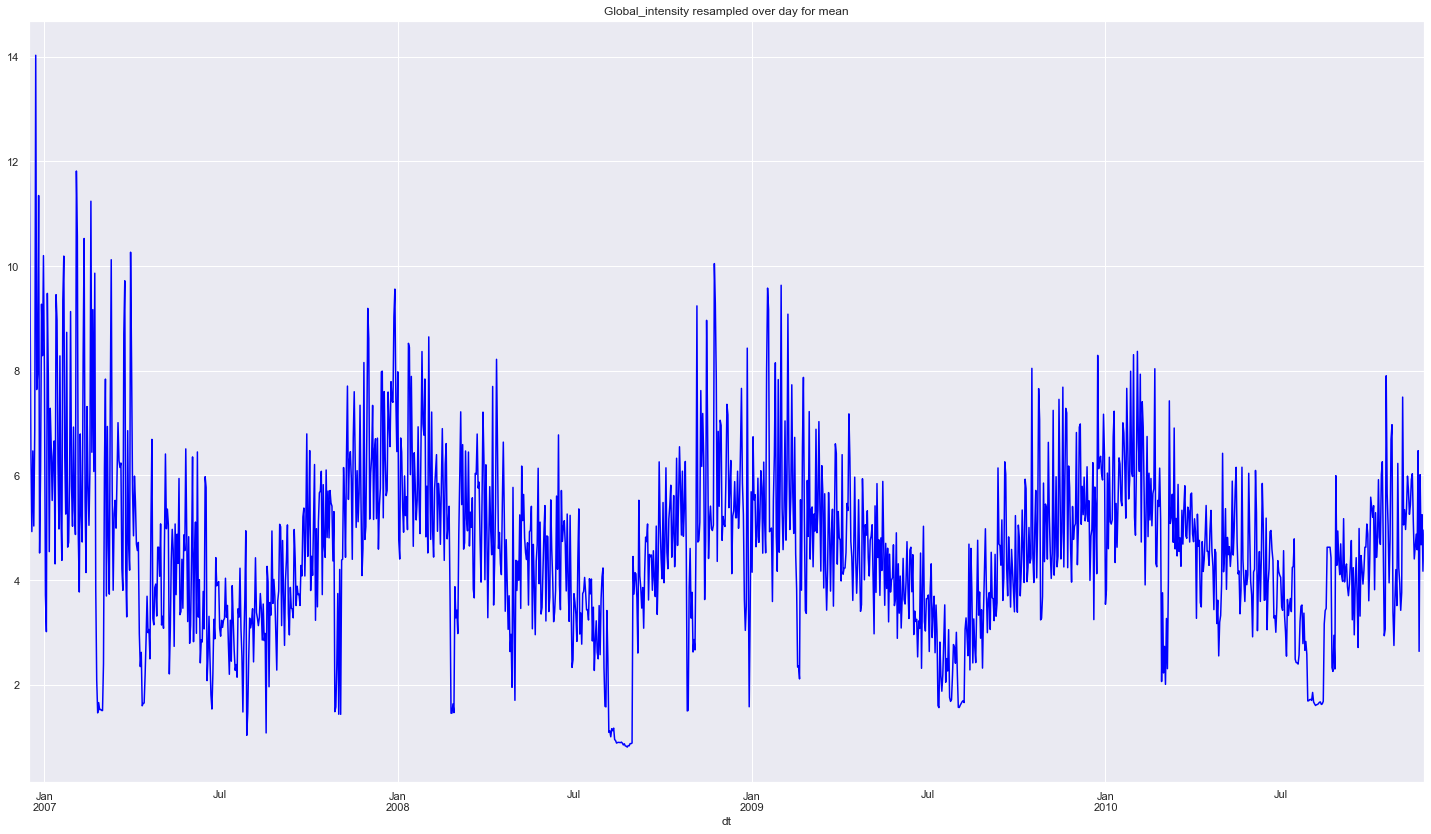

In [14]:
#Resampling over month for better visualization of the variables
df['Global_intensity'].resample('D').sum().plot(title='Global_intensity resampled over day for sum', color= 'red')  
plt.show()

df['Global_intensity'].resample('D').mean().plot(title='Global_intensity resampled over day for mean', color= 'blue')  
plt.show() 

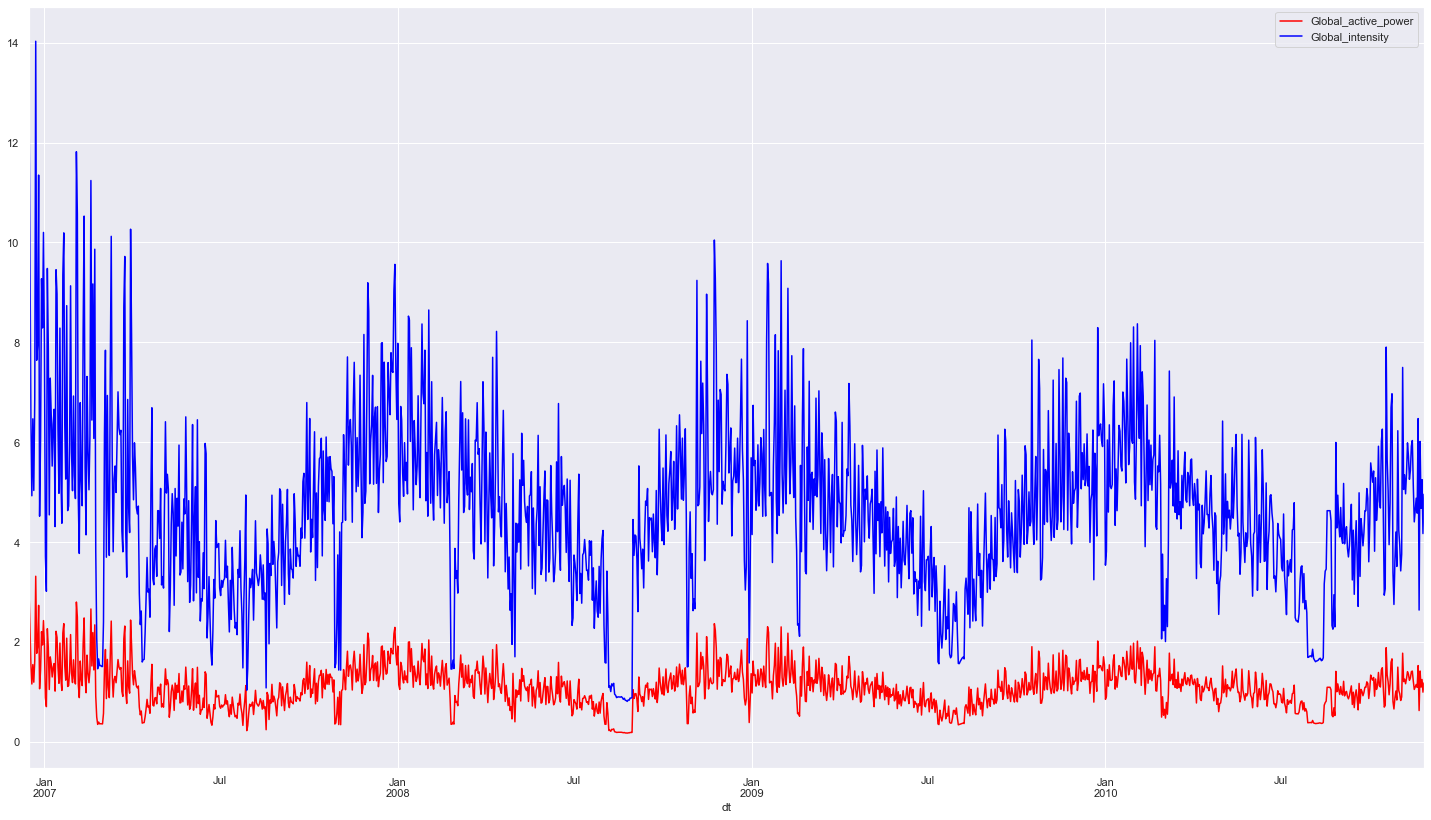

In [15]:
##Computing mean for both variables over days
df['Global_active_power'].resample('D').mean().plot(color='red', legend=True)
df['Global_intensity'].resample('D').mean().plot(color='blue', legend=True)
plt.show()

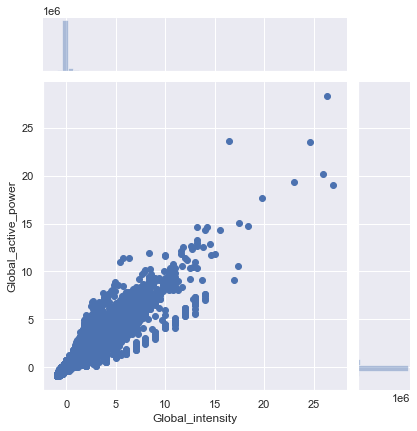

In [16]:
##Comparing both variables
df_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df_returns)  

plt.show()

## Correlation analysis

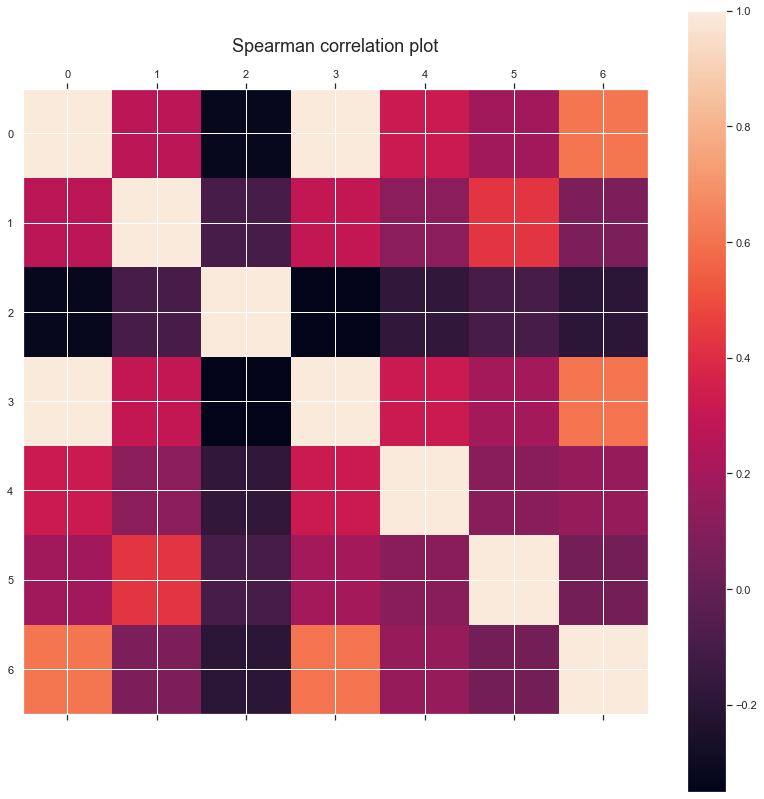

In [17]:
#Using Spearman's rank correlation coefficient to check the correlation between other variables 
plt.matshow(df.corr(method='spearman'))
plt.title('Spearman correlation plot', size=18)
plt.colorbar()
plt.show()

## Data preparation: resampling

In [18]:
#Resampling of data over hour
df_resample_day = df.resample('d').mean() 
df_resample_day.shape

(1442, 7)

In [19]:
df_resample_day.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


## Data preparation: normalizing the input and target features


In [20]:
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(df_resample_day[[ 'Global_reactive_power','Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [21]:
X.rename(columns={0:'Global_reactive_power', 1:'Global_intensity', 2:'Sub_metering_1', 3:'Sub_metering_2', 4:'Sub_metering_3'}, inplace=True)
X.index= df_resample_day.index
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,
2006-12-16,0.130732,0.928499,0.000000,0.163965,0.740357
2006-12-17,0.426671,0.695226,0.181857,0.345776,0.536762
2006-12-18,0.234750,0.424618,0.095088,0.216451,0.566912
2006-12-19,0.202322,0.311508,0.075051,0.627798,0.218615
2006-12-20,0.232377,0.428075,0.000000,0.218680,0.568916


In [22]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(df_resample_day[['Global_active_power']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [23]:
y.rename(columns={0:'Global_active_power'}, inplace= True)
y.index= df_resample_day.index
y.head(2)

,Global_active_power
dt,
2006-12-16,0.916786
2006-12-17,0.694252


## Stationary test: Augmented Dickey–Fuller test

For that we decomposing Time Series into several components: Trend, Seasonality and Random noise (visually) and then perform the Augmented Dickey–Fuller test in order to test whether our data is Stationary

<ipython-input-24-7202a29216f0>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seas_d=sm.tsa.seasonal_decompose(y['Global_active_power'],model='add',freq=365);


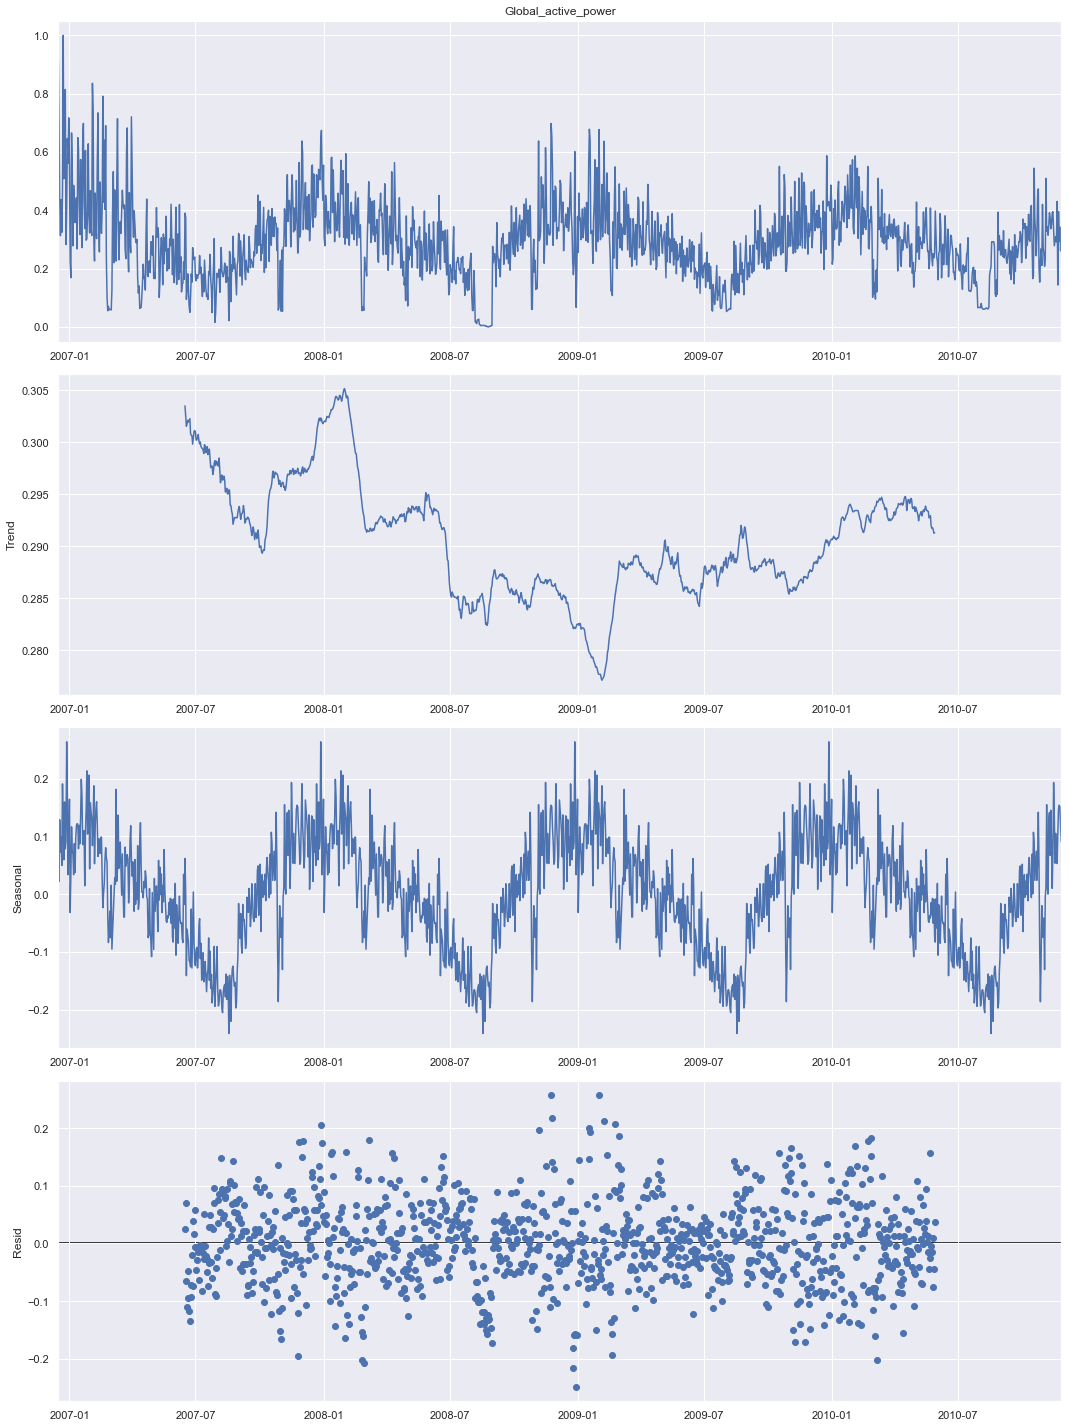

In [24]:
plt.rcParams["figure.figsize"] = (15,20)

seas_d=sm.tsa.seasonal_decompose(y['Global_active_power'],model='add',freq=365);
fig=seas_d.plot()
plt.show()

In [25]:
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print(f"The p-value for the Augmented Dickey-Fuller test is {dftest[1]}")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print(f"The p-value for the Augmented Dickey-Fuller test is  {dftest[1]}")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [26]:
y =y['Global_active_power']
test_adf(y, " 'Global_active_power'")

The p-value for the Augmented Dickey-Fuller test is 0.024620731154805432
Reject Null Hypothesis - Data is Stationary
Data is Stationary  'Global_active_power'


# Train & Test Data split

In [27]:
train_size=int(len(df_resample_day) *0.7)
test_size = int(len(df_resample_day)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

## Analysis of ACF and PACF plots

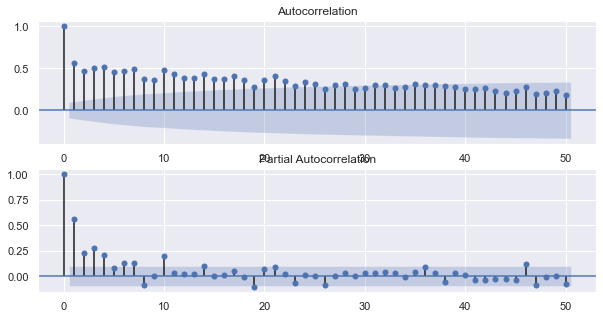

In [28]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(test_y, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(test_y, lags=50, ax=ax[1])
plt.show()

In [29]:
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1, 
                     start_q=1, 
                     max_p=7, 
                     max_q=7, 
                     d=1, 
                     max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8826.267, Time=3.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8553.939, Time=1.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8677.462, Time=2.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8773.429, Time=2.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8555.885, Time=1.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8828.225, Time=1.74 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8734.407, Time=2.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8789.099, Time=2.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8762.454, Time=3.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8824.715, Time=3.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8773.951, Time=2.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8772.921, Time=2.53 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-8832.526, Time=2.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8828.369, Time=1.59 sec
 ARIMA(2,1,0)(0,0,0

In [30]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1009
Model:               SARIMAX(2, 1, 1)   Log Likelihood                4425.263
Date:                Mon, 09 Nov 2020   AIC                          -8832.526
Time:                        17:10:03   BIC                          -8788.285
Sample:                    12-16-2006   HQIC                         -8815.718
                         - 09-19-2009                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Global_reactive_power    -0.0119      0.001    -11.509      0.000      -0.014      -0.010
Global_intensity          1.0028      0.001    997.498      0.000       1.001       1.005
Sub_metering_1           -0.0026      0.001     -3.763      0.000      -0.004      -0.001
Sub_metering_2           -0.0014      0.001     -2.595      0.009      -0.003      -0.000
Sub_metering_3            0.0075      0.001      8.714      0.000       0.006       0.009
ar.L1                     0.3767      0.034     11.157      0.000       0.311       0.443
ar.L2                     0.0525      0.030      1.732      0.083      -0.007       0.112
ma.L1                    -0.8636      0.027    -32.551      0.000      -0.916      -0.812
sigma2                 8.982e-06   2.72e-07     33.028      0.000    8.45e-06    9.51e-06
===================================================================================
Ljung-Box (Q):                       94.90   Jarque-Bera (JB):               544.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.17
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# The suggestion by auto_arima is SARIMAX and the value for p,d,q is (2,1,1)

## Train model using SARIMAX (Seasonal Autoregressive Integrated Moving Average)


In [32]:
model= SARIMAX(train_y, 
 exog=train_X,
 order=(2,1,1),
 enforce_invertibility=False, enforce_stationarity=True)

In [33]:
sarima= model.fit()

/Users/ddelacruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [34]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                 1009
Model:                SARIMAX(2, 1, 1)   Log Likelihood                4429.429
Date:                 Mon, 09 Nov 2020   AIC                          -8840.859
Time:                         17:10:05   BIC                          -8796.617
Sample:                     12-16-2006   HQIC                         -8824.051
                          - 09-19-2009                                         
Covariance Type:                   opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Global_reactive_power    -0.0119      0.001    -11.480      0.000      -0.014      -0.010
Global_intensity          1.0028      0.001    981.671      0.000       1.001       1.005
Sub_metering_1           -0.0026      0.001     -3.753      0.000      -0.004      -0.001
Sub_metering_2           -0.0014      0.001     -2.533      0.011      -0.002      -0.000
Sub_metering_3            0.0074      0.001      8.653      0.000       0.006       0.009
ar.L1                     0.3692      0.028     13.059      0.000       0.314       0.425
ar.L2                     0.0441      0.029      1.527      0.127      -0.013       0.101
ma.L1                    -0.9033      0.017    -53.157      0.000      -0.937      -0.870
sigma2                 8.891e-06   2.65e-07     33.492      0.000    8.37e-06    9.41e-06
===================================================================================
Ljung-Box (Q):                       89.98   Jarque-Bera (JB):               516.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.11
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Make prediction with the fitted model

In [35]:
start =train_size
end= train_size+test_size

In [36]:
predictions= sarima.predict(start, end-1, exog=test_X)

In [37]:
print('SARIMA model MSE:{}'.format(mean_squared_error(test_y,predictions)))

SARIMA model MSE:2.2378456515920967e-05


In [38]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [39]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Global_active_power']
predictions.rename(columns={0:'Pred'}, inplace=True)

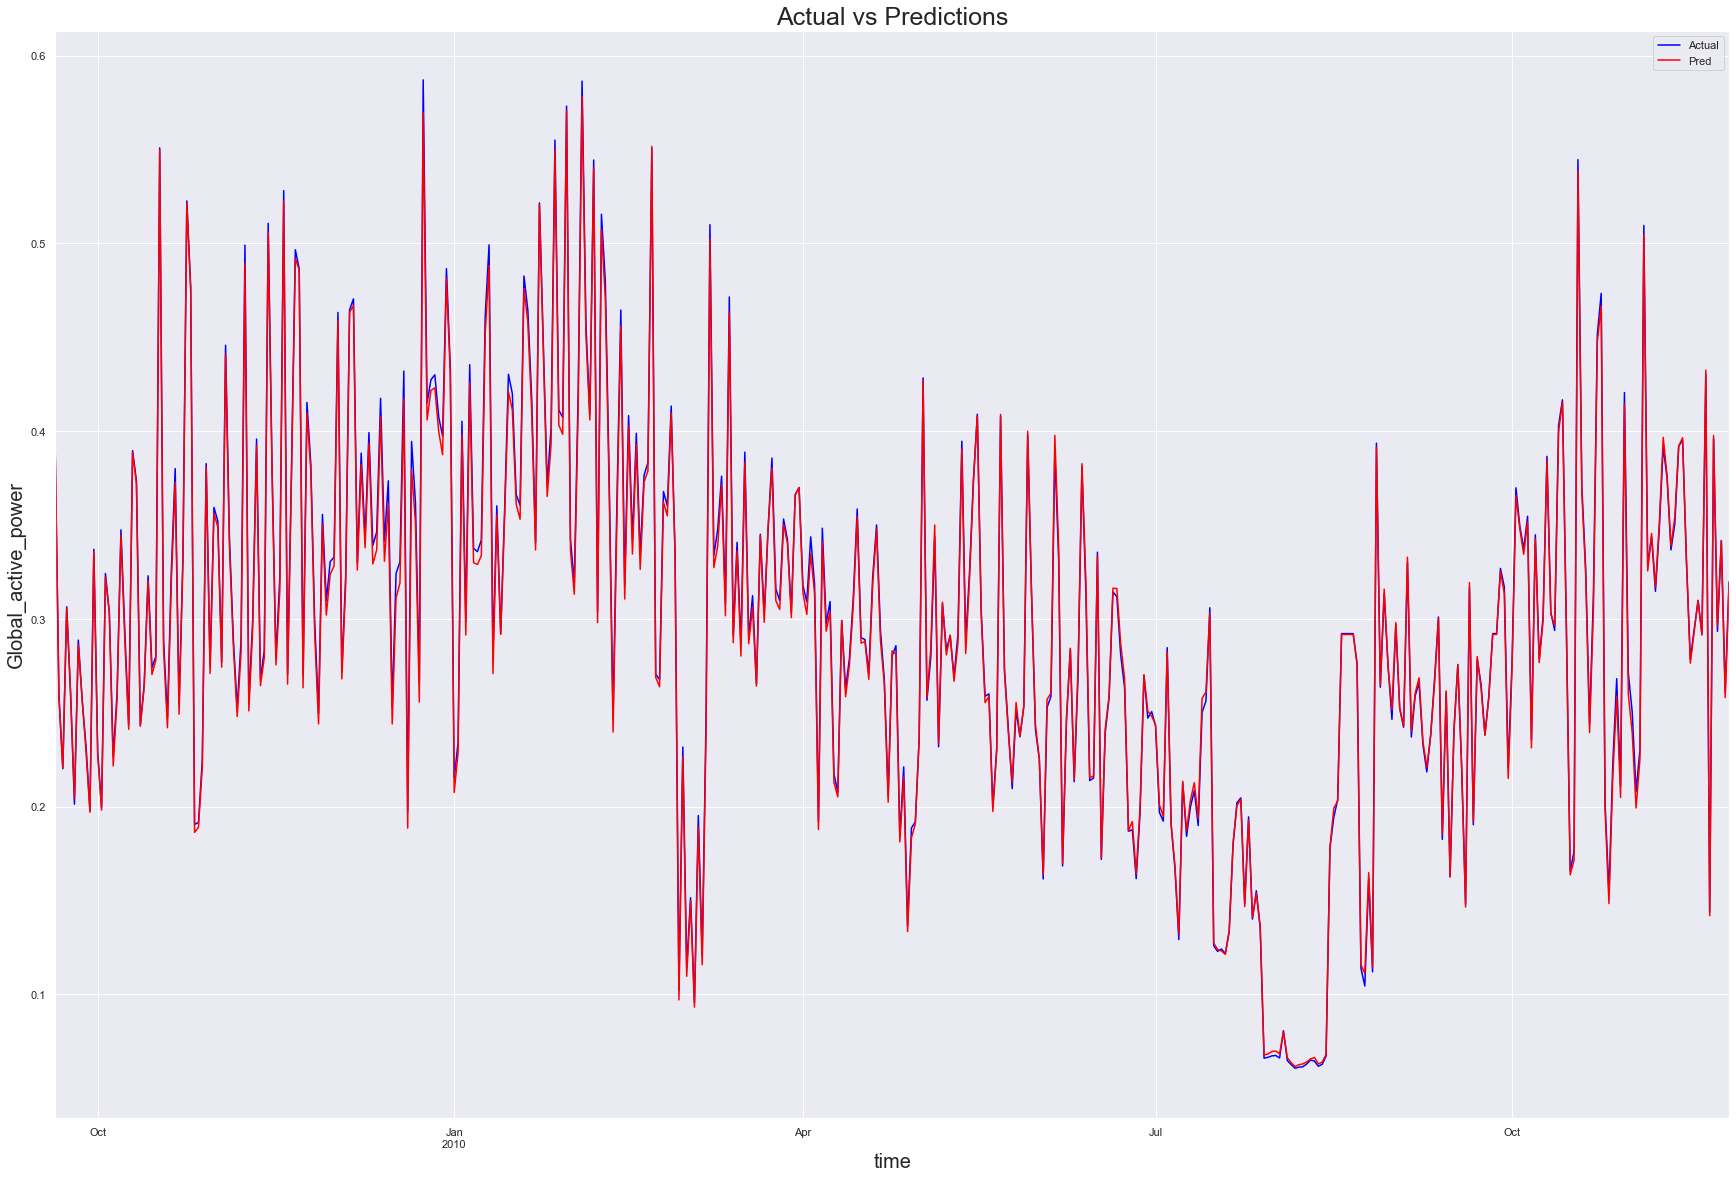

In [40]:
predictions['Actual'].plot(figsize=(30,20), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(30,20))
plt.xlabel('time', fontsize=20)
plt.ylabel('Global_active_power', fontsize=20)
plt.title('Actual vs Predictions',fontsize=25);